In [1]:
import pandas as pd
import numpy as np 
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing  import scale
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.grid_search import GridSearchCV,RandomizedSearchCV
%matplotlib inline



For the following exercises, you will be using the Scikit-learn version of SVC. 

##Part 1: Preprocessing data for SVM

Intuitively, it makes sense that SVMs might need scaling. Since SVMs are sensitive to the 
distance of points relative to a hyperplane, if one dimension had units in the thousands, 
the distance along that dimension would overwhelm another dimension with values in `[0,1]`. 
And the model would focus disproportionately on the larger dimension. Scaling overcomes this.

<br>

1. Load the file `data/non_sep.csv` into a dataframe. Note the file type. Call the features `X` and `y`. **WARNING**: This is an important part of all data science. Make sure that the labels `y` are correctly set up. They should be labeled either `1` or `0`.

2. Use some EDA to look at the features and structure of the dataset.

3. Scale both features using [`scale`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html).

4. Plot the decision boundary along with the data points. Use the plot_decision function below.

5. Fit the linear SVC again without scaling the data. What do you notice? The SVC should fit much faster when the
   features are scaled, otherwise in this case it should take around 3 minutes to run.

6. Use `cross_val_score` to compute the average `accuracy` of a 5-fold cross validation of the scaled model. 


In [2]:
def plot_decision(model, X, y, fig, ax, margins=False):
    """INPUTS:
        model: a trained classifier, with a predict method
        X: The feature matrix
        y: The response vector
        fig: Matplotlib figure object
        ax: Matplotlib axis object
       OUTPUTS:
          OBJECT: fig, ax
    """


    xmin = np.min(X[:, 0]) - 0.2
    xmax = np.max(X[:, 0]) + 0.2
    ymin = np.min(X[:, 1]) - 0.2
    ymax = np.max(X[:, 1]) + 0.2

    # find decision boundary 
    model.fit(X, y)
    w = model.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(xmin,xmax, 1000)
    yy = a * xx - model.intercept_[0] / w[1]

    def plot_vector(ax1):
        # find support vectors and margins
        b = model.support_vectors_[0]
        minus_plane = a * xx + (b[1] - a * b[0])
        b = model.support_vectors_[-1]
        plus_plane = a * xx + (b[1] - a * b[0])

        # plot support vectors
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=50, c='k')

        # plot margin
        ax.plot(xx, minus_plane, 'r--')
        ax.plot(xx, plus_plane, 'b--')


    if margins:
        plot_vector(ax)

    reg = ("; C = " + str(model.get_params()['C'])) if type(model) == SVC else ''
    # plot decision boundary
    colors = ['r' if z==1 else 'b' for z in y]
    ax.plot(xx, yy, label=str(type(model)).split(".")[-1][:-2] + reg)
    ax.scatter(X[:, 0], X[:, 1], c=colors, cmap=plt.cm.Paired)

    ax.legend()

    plt.xlim((xmin,xmax))
    plt.ylim((ymin, ymax))
    return fig, ax

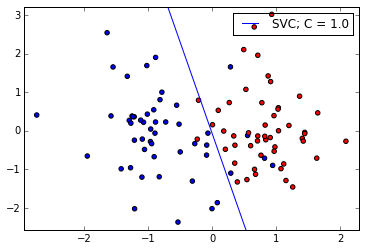

In [3]:
nonsep_df = pd.read_csv('data/non_sep.csv')
X = nonsep_df[['x1','x2']]
y = nonsep_df['y']
Xscale = scale(X)

SVCModel = SVC(kernel='linear')
fig1, ax1 = plt.subplots()
plot_decision(SVCModel,Xscale,y, fig1, ax1)
plt.show()
# X.head()
# y.head()
# nonsep_df.head()
# nonsep_df.groupby('y').ID.count()

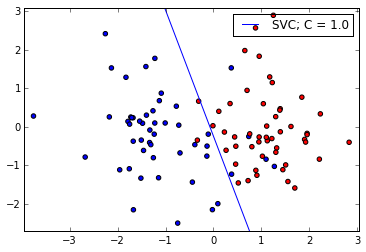

In [4]:
Xnp = X.as_matrix()
SVCModel2 = SVC(kernel='linear')
fig2, ax2 = plt.subplots()
plot_decision(SVCModel2,Xnp,y, fig2, ax2)
plt.show()

In [5]:
nonsep_df = pd.read_csv('data/non_sep.csv')
X = nonsep_df[['x1','x2']]
y = nonsep_df['y']
Xscale = scale(X)

# kf = KFold(100, n_folds = 5)
SVCModel = SVC(kernel='linear')

# for train_index, test_index in kf:
#     X_train, X_test = Xscale[train_index], Xscale[test_index]
#     y_train, y_test = y[train_index], y[test_index]
cross_val_score(SVCModel, Xscale, y, cv=5, scoring='accuracy')


array([ 1.  ,  0.85,  0.85,  1.  ,  0.95])

##Part 2: Hyperparameter C
You have probably noticed that the dataset used in `Part 1` is not linearly separable.
In reality, you will rarely encounter a dataset that is linearly separable. In such cases,
SVMs have a tradeoff between maximizing the margin and minimizing the 
classification error. The hyperparameter `C` controls this tradeoff. It is equivalent 
to 1/λ (the regularization term from Ridge/Lasso), thus smaller values of `C` result in larger λ.
Continue using `data/non_sep.csv` for this part.

<br>

1. Loop through a list of values of `C` in the list `0.001`, `0.01`, `0.1`, `1`, `10`, `100`, and train the linear `SVC` with each of the `C` values. 

2. Plot the respective decision boundaries: this will give you an intutition as to how changes to `C` affect the decision boundary. 

3. Plot how the cross-validated accuracy changes with `C`, and find the highest cross-validated accuracy.

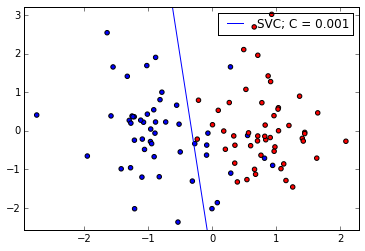

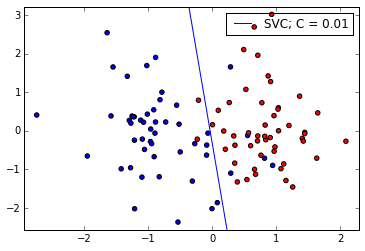

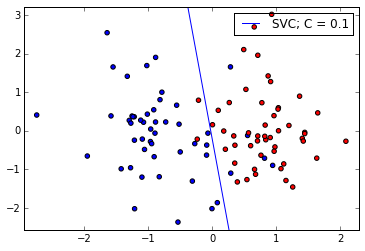

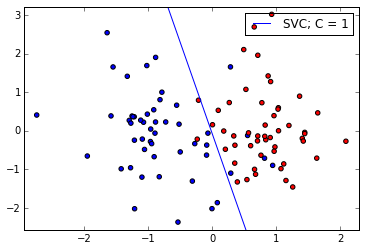

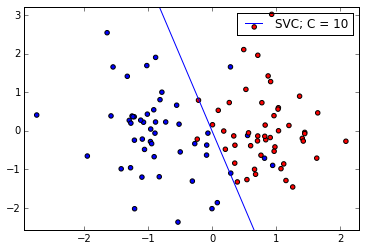

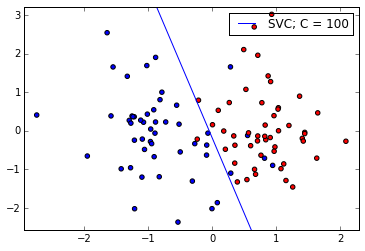

In [6]:
for x in [0.001, 0.01, 0.1, 1, 10, 100]:
    SVCModel = SVC(kernel='linear',C=x)
    fig1, ax1 = plt.subplots()
#     fig2, ax2 = plt.subplots()
    plot_decision(SVCModel,Xscale,y, fig1, ax1)
#     ax2.plot(cross_val_score(SVCModel, Xscale, y, cv=5, scoring='accuracy'))
    plt.show()

0.001 : 0.89 Accuracy


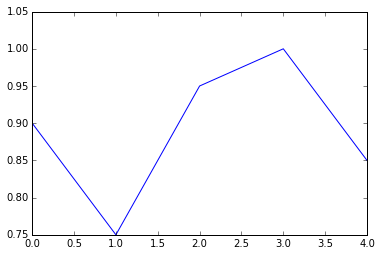

0.01 : 0.9 Accuracy


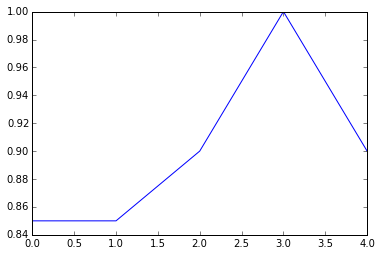

0.1 : 0.92 Accuracy


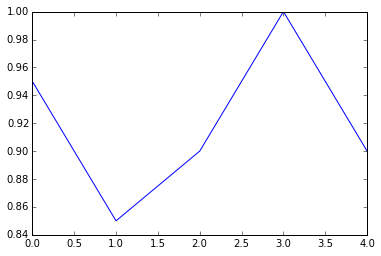

1 : 0.93 Accuracy


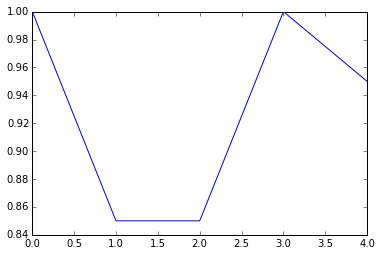

10 : 0.92 Accuracy


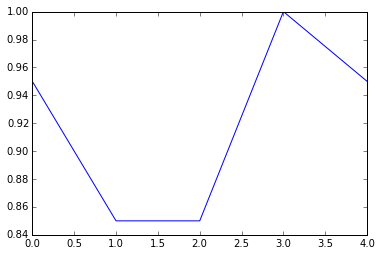

100 : 0.92 Accuracy


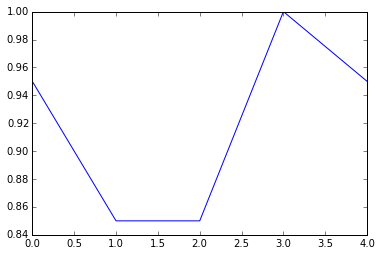

In [7]:
for x in [0.001, 0.01, 0.1, 1, 10, 100]:
    SVCModel = SVC(kernel='linear',C=x)
    plt.plot(cross_val_score(SVCModel, Xscale, y, cv=5, scoring='accuracy'))
    print "{} : {} Accuracy".format(x,np.mean(cross_val_score(
                SVCModel, Xscale, y, cv=5, scoring='accuracy')))
    plt.show()

##Part 3: Kernel Tricks

SVMs can use kernel functions to transform the features into a new feature
space. Thus far we have been using a linear kernel, but SVMs can use non-linear
kernels.

![](http://rvlasveld.github.io/images/oc-svm/visualization.gif)

Two of the most common nonlinear kernels are the polynomial kernel function and
the Gaussian kernel function (also known as the Radial Basis Function, or RBF).

Both of these kernels transform the data into a new space where the
data may be (more) linearly separable.

####RBF Kernel

`K(x, z) = exp(gamma * (distance(x, z))^2)`

`gamma` is a hyperparameter that determines the spread of the Gaussian around each point. `distance` is Euclidean distance.

[Wikipedia - RBF
Kernel](http://en.wikipedia.org/wiki/Radial_basis_function_kernel)

####Polynomial Kernel

`K(x, z) = (1 + x.T.dot(z))^d`


`d` is a hyperparameter that determines the degree of the polynomial transform.

[Wikipedia - Polynomial Kernel](http://en.wikipedia.org/wiki/Polynomial_kernel)

In practice, RBF kernels are more often used (scikit learn uses the RBF as the
default kernel in SVC). The polynomial kernel at high degrees often leads to
overfitting.

<br>

1. Use your skills in parsing and loading data to train a model on `non_linear.csv` using  the RBF kernel. Use the ravel function as above. For now, use the parameters `C = 1` and `gamma = 1`.
    
2. Use the function below to visualize non-linear decision boundaries of the models.
<br>


In [8]:
def decision_boundary(clf, X, Y, h=.02):
    """INPUTS:
        clf: a trained classifier, with a predict method
        X: The feature matrix
        y: The response vector
        h: meshgrid fineness
       OUTPUTS:
          None
    """
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

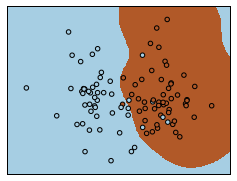

In [9]:
SVCModel = SVC(C=1,gamma=1).fit(Xscale,y)
decision_boundary(SVCModel,Xscale,y)

##Part 4: Grid Search

Let's say we have a model using a polynomial kernel but we have yet to tune our
hyperparameters. In this case, there are two: first, `C`, as always, and second,
`degree`, the degree of the polynomial kernel. What we'd like to know is which
combination of hyperparameters yields the best results. Scikit-learn's
[`grid_search`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html)
module has just what we need.

<br>

1. In your instantiation `gsCV` of `GridSearchCV`, set `scoring='accuracy'` to set the scoring
   type to classification accuracy and `cv=10` to set the number of folds in K-fold CV to 10.
   
2. You can find the result of the grid search with `gsCV.grid_scores_` and the winner in `gsCV.best_params_`. Conduct a grid search over a range of possible values of `C` and `gamma` and find the values of `C` and `gamma` that maximize the cross-validation accuracy.

3. Compare the accuracy of the tuned RBF model to the untuned model.

4. Graph the decision boundary of the tuned model and compare it with the decision boundary of the untuned model.

<br>


{'C': 0.1, 'gamma': 0.1}

0.93 Accuracy


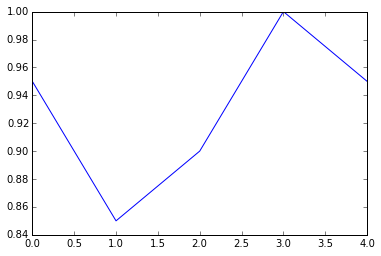

In [29]:
SVCModel = SVC()
# parameters = { 'C':[1, 10], 'gamma': [.01,.001]}
param_dist = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
          'gamma': [.1, 0.01, 0.001]}
rsCV = RandomizedSearchCV(estimator=SVCModel,param_distributions=param_dist,
                          scoring='accuracy',cv=10)
rsCV.fit(Xscale,y)
print rsCV.best_params_ 
print
# SVCModel2 = SVC(C=.1,gamma=.1)
SVCModel2 = SVC(**rsCV.best_params_)

# gsCV = GridSearchCV(SVCModel, parameters,cv=10,scoring='accuracy')
# gsCV.fit(Xscale,y)
# print gsCV.grid_scores_
# print gsCV.best_params_
print "{} Accuracy".format(np.mean(cross_val_score(
                SVCModel2, Xscale, y, cv=5, scoring='accuracy')))
plt.plot(cross_val_score(SVCModel2, Xscale, y, cv=5, scoring='accuracy'))
    

##Part 5: Real-world Modeling

In most cases, we won't be able to visualize our SVM solution; we'll have too many variables. In such cases, we have to rely exclusively on cross-validation to select from among competing solutions.

<br>

1. Load the file `data/dataset_1.csv` into a dataframe.

2. Scale the features.

3. Try different models, kernels etc. and see which performs best in cross validation. Perform `GridSearchCV`
   as appropriate as it is a timely process. You should be able to achieve over **95% accuracy** with this dataset.

<br>


In [34]:
df1 = pd.read_csv('data/dataset_1.csv')
X = df1[['x1','x2','x3','x4']]
y = df1['y']
Xscale = scale(X)
SVCModel=SVC()
param_dist = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
          'gamma': [.1, 0.01, 0.001]}
rsCV = RandomizedSearchCV(estimator=SVCModel,param_distributions=param_dist,
                          scoring='accuracy',cv=10)
rsCV.fit(Xscale,y)
print rsCV.best_params_ 
print
print rsCV.best_score_

{'C': 10, 'gamma': 0.1}

0.968260685569


##Part 6: SVM Applications to Wide and Tall Data

In general, as the number of features increases, the gain of accuracy of using an RBF kernel instead of a linear
kernel becomes smaller. Here we explore a "wide" dataset where 7129 features of a patient is used used predict if he/she
has leukemia.

What are the properties of a wide dataset? What does it mean with respect to the linear algebra of the data? What would you expect for a "typical" model applied to such data?

1. Load the file `data/dataset_2.csv` into a dataframe

2. Fit and perform gridsearch with a RBF kernel and a linear kernel.

3. Compare the performance of the two kernels. What are the advantages of using a linear kernel when the performance
   is similar to an RBF?


<br>

Here we explore a "tall" dataset, where there are 200,000 entries and 13 rows. What are the properties of a tall dataset? What does this condition mean with respect to linear algebra?
 
1. Load the file `data/dataset_3.csv` into a dataframe. It has been scaled, so you will not need to scale it.
   Subsample 3,000 rows to shorten our training time. Normally if time is not a constraint, then subsample is 
   not necessary.
   
2. Gridsearch to select the best model for linear and RBF kernels.
   Comment on their relative performance. Be careful not to search the parameter space too
   exhaustivley, or you'll find it takes a long time. Start with no more than 5 values.


<br>


In [46]:
df2 = pd.read_csv('data/dataset_2.csv')
# print df2.head()
X = df2.ix[:,1:]
y = df2['target']
# X.head()
# y.head()
Xscale = scale(X)
Model=SVC()
param_dist = {'kernel': ['linear','rbf'],'C': [0.001, 0.01, 0.1, 1, 10, 100]
              ,'gamma': [.1, 0.01, 0.001]}
rsCV = RandomizedSearchCV(estimator=Model,param_distributions=param_dist,
                          scoring='accuracy',cv=10)
rsCV.fit(Xscale,y)
print rsCV.best_params_ 
print
print rsCV.best_score_

{'kernel': 'linear', 'C': 0.001, 'gamma': 0.1}

0.986111111111


In [8]:
df3 = pd.read_csv('data/dataset_3.csv')
# print df3.head()
X = df3.ix[0:2999,1:]
y = df3.ix[0:2999,0]
# X.head()
# y.head()
# Xscale = scale(X)
Model=SVC()
param_dist = {'kernel': ['linear','rbf'],'C': [0.001, 0.01, 0.1, 1, 10, 100]
              ,'gamma': [.1, 0.01, 0.001]}
rsCV = RandomizedSearchCV(estimator=Model,param_distributions=param_dist,
                          scoring='accuracy',cv=10)
rsCV.fit(X,y)
print rsCV.best_params_ 
print
print rsCV.best_score_

{'kernel': 'rbf', 'C': 10, 'gamma': 0.1}

0.683666666667


##Part 7: Multiclass SVM

So far, we've focused on two-class classification problems, but what if we have multiple classes?
We might want to classify which section of a newspaper an article belons in, what digit is 
represented by an image, etc. So how can we extend our binary classifiers to deal with such cases?

To train a binary classifier to identify multiple classes often something called one-vs-rest is used, which trains each possible class against all other classes at a time. Another option, implemented by default in SVC is one-vs-one, which trains each class against the other.

   1. How many models need to be trained to predict all classes in a one-vs-rest approach?
   2. In a one-vs-one? (Remember, you don't need to train both x vs. y and y vs. x).

In scikit-learn the default SVC handles multiclass internally  one-vs-one , but other 
classification algorithms use one-vs-rest.  For this exercise we will be 
using [scikit-learns](http://scikit-learn.org/stable/modules/multiclass.html#one-vs-the-rest) 
one-vs-the-rest classifier.

<br>

1. Using the [digit data set](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)
   create a one-vs-one classifier and a one-vs-rest classifier and train them with LinearSVC 
   and a LogisticRegression. __For the OvR logistic regression, you'll have to use the builtin multi-class support instead of the OneVsRest class. Use the one-vs-rest classifier for both the 
   LinearSVC and the LogisticRegression. Compare the performance of each for precision, recall, 
   and accuracy. Feel free to sample the dataset if it is taking too long to run
   
<br>   


In [26]:
import pylab as pl
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

LSVC = LinearSVC()
LReg = LogisticRegression()
digits = datasets.load_digits(n_class=10)

y = digits.target
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))

OLSVC = OneVsRestClassifier(LSVC).fit(X[n_samples / 2:], y[n_samples / 2:])
OLReg = OneVsRestClassifier(LReg).fit(X[n_samples / 2:], y[n_samples / 2:])

print OLSVC.score(X[:n_samples / 2], y[:n_samples / 2])
print OLReg.score(X[:n_samples / 2], y[:n_samples / 2])

0.861915367483
0.886414253898
